# Natural Language Processing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing DataSet and more

In [2]:
df = pd.read_csv("Restaurant_Reviews.tsv", delimiter="\t", quoting = 3)

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Clean The text

In [4]:
import re
import nltk
# nltk.download("stopwords")
from nltk.corpus import stopwords

In [5]:
df["Review"][0]

'Wow... Loved this place.'

In [6]:
review = re.sub("[^a-zA-Z]", " ", df["Review"][0])
review = review.lower()
review

'wow    loved this place '

In [7]:
review = review.split()
review

['wow', 'loved', 'this', 'place']

In [8]:
review = [word for word in review if not word in set(stopwords.words("english"))]
review

['wow', 'loved', 'place']

In [9]:
len(stopwords.words("english"))

179

In [10]:
from nltk.stem.porter import PorterStemmer

In [11]:
ps = PorterStemmer()

In [12]:
review = [ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
review

['wow', 'love', 'place']

In [13]:
review = " ".join(review)
review

'wow love place'

## Bring all of these together for comlete dataset

In [14]:
corpus = []
for i in range(len(df)):
    review = (re.sub("[^a-zA-Z]", " ", df["Review"][i])).lower()
    review = [ps.stem(word) for word in review.split() if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

In [15]:
corpus[11], df["Review"][11] ## This is a problem

('would go back', 'Would not go back.')

## Creating the Bag of Words model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()

In [17]:
y = df.iloc[:,-1].values

In [18]:
x.shape, y.shape

((1000, 1500), (1000,))

## Classification model

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [20]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)

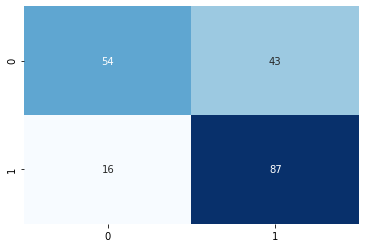

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, cmap="Blues", cbar = False, annot = True,fmt ="")
plt.show()

In [22]:
model.score(x_test, y_test)

0.705